In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.facecolor'] = 'white'
from scipy.optimize import newton


In [2]:

# Constants
G = 6.67430e-11                # gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.98847e30             # solar mass (kg)
M_jup = 1.898e27               # Jupiter mass (kg)
day = 86400                    # seconds in a day


In [131]:
time   = np.array([2460474.57198915 , 2460435.75850621,  2460499.67428951,  2460455.62586687, 2460516.54010265])
rv     = np.array([-117.83011489 , -117.71543337 , -116.5371912 ,  -117.48537324 ,  -117.24155665])
rv_err = np.array([0.04487504, 0.03975618, 0.04247364, 0.04613382, 0.0412279 ])

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import newton

# # Constants
# G = 6.67430e-11                # gravitational constant (m^3 kg^-1 s^-2)
# M_sun = 1.98847e30             # solar mass (kg)
# M_jup = 1.898e27               # Jupiter mass (kg)
# day = 86400                    # seconds in a day

# # Inputs
# P_day = 20.
# P = P_day * day                  # orbital period in seconds
# e = 0.25                        # eccentricity
# M2sini = 15.0 * M_jup           # companion mass (M*sin i)
# M1 = 1.03 * M_sun               # mass of the star
# omega = 0.0                     # argument of periastron (rad)
# T0 = 0.0                        # time of periastron

# # Time array
# t = np.linspace(0, P, 500)
# t = np.linspace(0, max(time)-min(time), 500) * 86400. # in seconds

# # Compute semi-amplitude K
# K = ((2 * np.pi * G / P)**(1./3)) * (M2sini) / ((M1 + M2sini)**(2./3)) / np.sqrt(1. - e**2)  # in m/s

# print(K/1000.)
# K = -110*1000
# # Kepler's Equation solver
# def kepler_eq(E, M, e):
#     return E - e * np.sin(E) - M

# # Compute RV curve
# vr = []
# for ti in t:
#     M = 2 * np.pi * (ti - T0) / P
#     E = newton(kepler_eq, M, args=(M, e))
#     nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
#                         np.sqrt(1 - e) * np.cos(E / 2))
#     v = K * (np.cos(nu + omega) + e * np.cos(omega))
#     vr.append(v)

# vr = np.array(vr)
# vr_kms = np.array(vr)/1000.
# # Plot
# plt.plot(t / day, vr_kms)
# plt.scatter(time - min(time), rv)
# plt.xlabel('Time [days]')
# plt.ylabel('Radial Velocity [km/s]')
# plt.title('Simulated RV Curve')
# plt.grid()
# plt.show()


##  Simulate curve for a given P & e (hard corded):

In [5]:

# # Inputs
# P_day        = 20.
# P            = P_day * day                 # orbital period in seconds
# e            = 0.0                         # eccentricity
# M2sini       = 15.0 * M_jup           # companion mass (M*sin i)
# M1           = 1.03 * M_sun               # mass of the star
# phi0         = 0.0                        # time of periastron
# v0_kms       = -117. #km/s
# v0           = v0_kms*1000
                

# # Time array
# t = np.linspace(0, max(time)-min(time), 500) * 86400. # in seconds

# # Calculate semi-amplitude K
# K = ((2 * np.pi * G / P)**(1./3)) * (M2sini) / ((M1 + M2sini)**(2./3)) / np.sqrt(1. - e**2)  # in m/s
# K = 1.13*1000

# # Kepler's equation solver
# def kepler_eq(E, M, e):
#     return E - e * np.sin(E) - M

# def sample_omega(omega):
#     # omega: argument of periastron (rad)
    
#     # Compute RV curve
#     vr = []
#     for ti in t:
#         M = 2 * np.pi * (ti - phi0) / P
#         E = newton(kepler_eq, M, args=(M, e))
#         nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
#                             np.sqrt(1 - e) * np.cos(E / 2))
#         v = K * (np.cos(nu + omega) + e * np.cos(omega))
#         vr.append(v)

#     vr = np.array(vr) + v0
#     vr_kms = np.array(vr)/1000. 
    
#     return vr_kms


# omegas = np.linspace(0, 1, 20)
# plt.figure(figsize=(14,14))
# for i,omega in enumerate(omegas):
#     plt.subplot(5, 4, i+1)
#     vr_kms = sample_omega(omega)
    
#     # Plot
#     plt.plot(t / day, vr_kms)
#     plt.scatter(time - min(time), rv)
#     plt.xlabel('Time [days]')
#     plt.ylabel('Radial Velocity [km/s]')
#     plt.title('Simulated RV Curve')
#     plt.grid()
# plt.tight_layout()
# plt.savefig('../plots/plota.png',bbox_inches='tight',dpi=200)
# plt.show()


##  Simulate curve for a range of P & e:

50


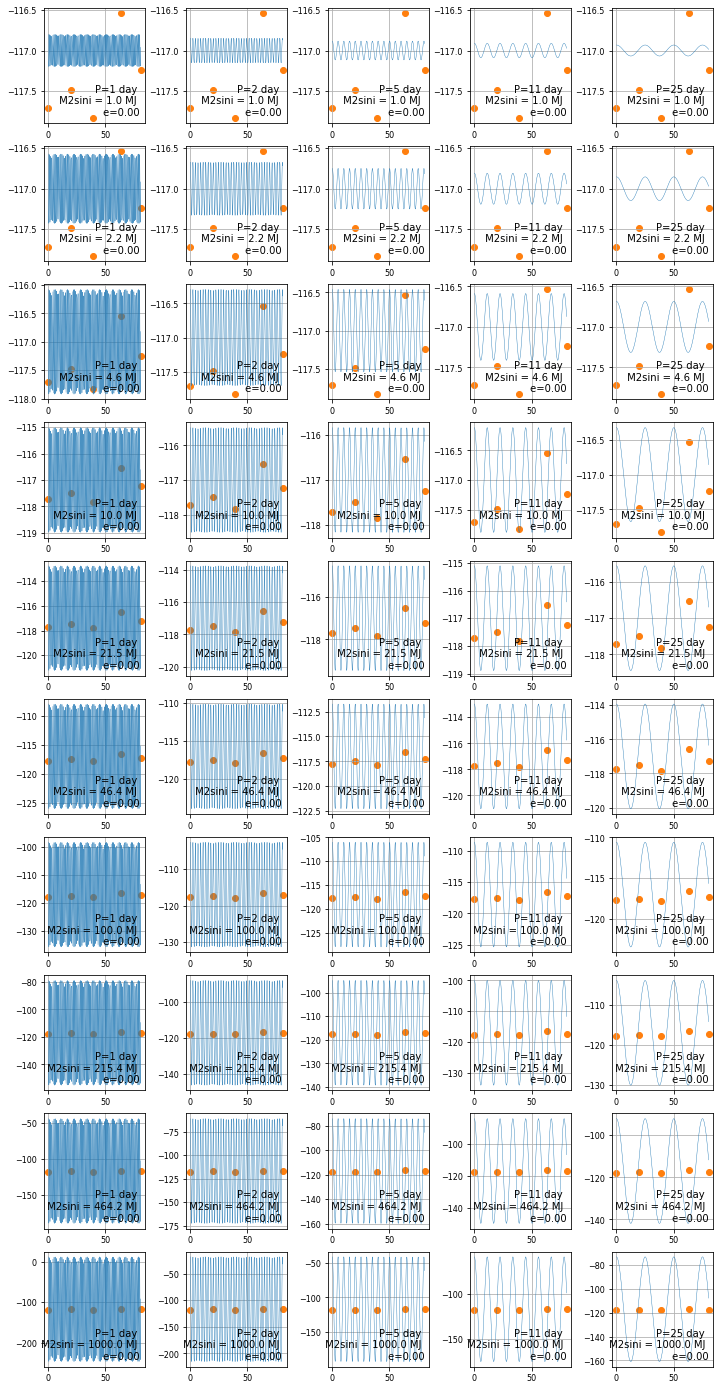

In [115]:
# Inputs
e            = 0.0                        # eccentricity
# M2sini       = 15.0 * M_jup             # companion mass (M*sin i)
M1           = 1.03 * M_sun               # mass of the star
phi0         = 0.0                        # time of periastron
v0_kms       = -117. #km/s
v0           = v0_kms*1000
                
# Time array
t = np.linspace(0, max(time)-min(time), 500) * 86400. # in seconds

# Kepler's equation solver
def kepler_eq(E, M, e):
    return E - e * np.sin(E) - M

def sample_omega(K,omega, P):
    # omega: argument of periastron (rad)
    
    # Compute RV curve
    vr = []
    for ti in t:
        M = 2 * np.pi * (ti - phi0) / P
        E = newton(kepler_eq, M, args=(M, e))
        nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
                            np.sqrt(1 - e) * np.cos(E / 2))
        v = K * (np.cos(nu + omega) + e * np.cos(omega))
        vr.append(v)

    vr = np.array(vr) + v0
    vr_kms = np.array(vr)/1000. 
    
    return vr_kms

# Calculate semi-amplitude K
def get_K_amp(P, M2sini):
    K = ((2 * np.pi * G / P)**(1./3)) * (M2sini) / ((M1 + M2sini)**(2./3)) / np.sqrt(1. - e**2)  # in m/s
    return K

omega  = 0
P_day  = np.logspace(0, 1.4, 5)
P      = P_day * day                          # orbital period in seconds
M2sini = np.logspace(0, 3, 10)*M_jup         # companion mass (M*sin i)
Ps,Ms  = np.meshgrid(P, M2sini)

coordinates = np.vstack((Ps.ravel(), Ms.ravel())).T
print(len(coordinates))
plt.figure(figsize=(12,25))

for i, coord in enumerate(coordinates):

    P_i, M2sini_i = coord
    K             = get_K_amp(P_i, M2sini_i)
    vr_kms        = sample_omega(K,omega, P_i)
    
    # Plot
    ax = plt.subplot(10,5,i+1)
    plt.plot(t / day, vr_kms, lw=0.4)
    plt.scatter(time - min(time), rv,c='C1')
    #plt.xlabel('Time [days]')
    #plt.ylabel('Radial Velocity [km/s]')
    s = 'P=%i day \n M2sini = %.1f MJ \n e=%.2f' % (P_i/day, M2sini_i/M_jup, e)
    plt.text(0.95, 0.05, s, ha='right', va='bottom', transform=ax.transAxes)
#     if i % 5 != 0: 
#         ax.tick_params(axis='both', left=False, labelleft=False)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    plt.grid()
plt.subplots_adjust(wspace=0.4)
plt.savefig('../plots/plotb_e=%.2f.png'%e,bbox_inches='tight',dpi=200)
plt.show()


36


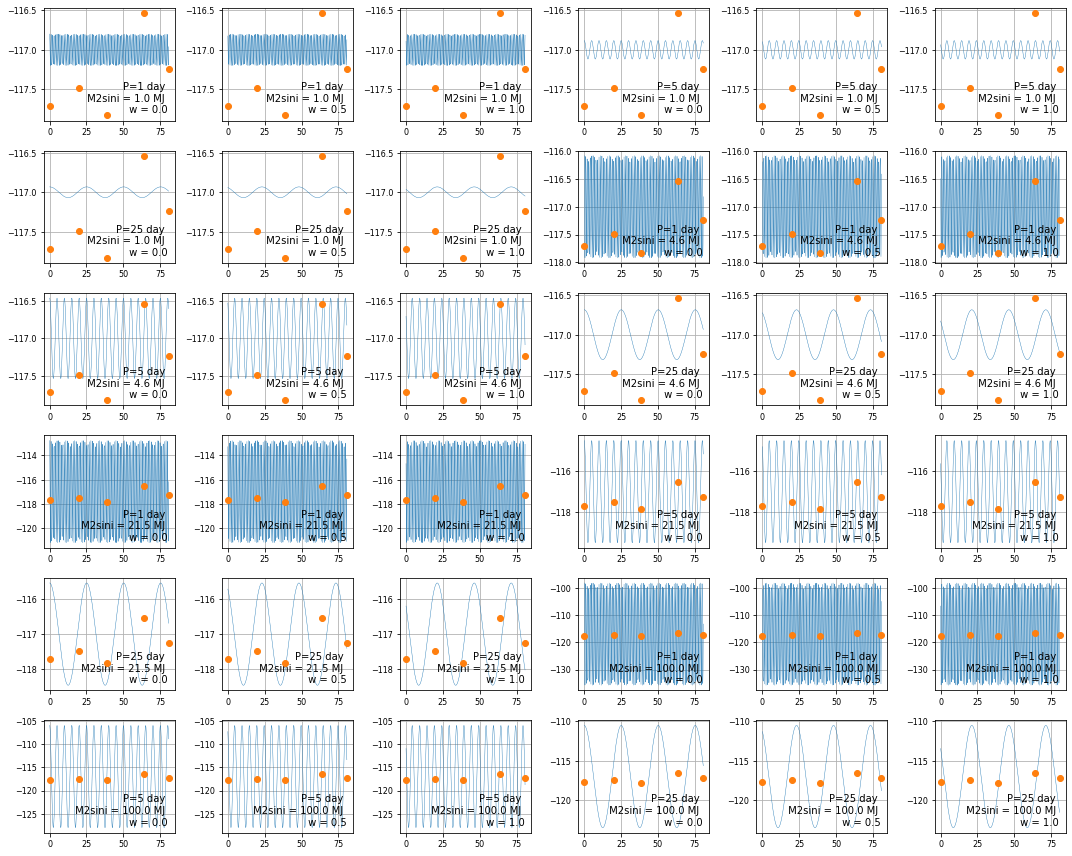

In [116]:
# Inputs
e            = 0.0                        # eccentricity
# M2sini       = 15.0 * M_jup             # companion mass (M*sin i)
M1           = 1.03 * M_sun               # mass of the star
phi0         = 0.0                        # time of periastron
v0_kms       = -117. #km/s
v0           = v0_kms*1000
                
# Time array
t = np.linspace(0, max(time)-min(time), 500) * 86400. # in seconds

# Kepler's equation solver
def kepler_eq(E, M, e):
    return E - e * np.sin(E) - M

def sample_omega(K,omega, P):
    # omega: argument of periastron (rad)
    
    # Compute RV curve
    vr = []
    for ti in t:
        M = 2 * np.pi * (ti - phi0) / P
        E = newton(kepler_eq, M, args=(M, e))
        nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
                            np.sqrt(1 - e) * np.cos(E / 2))
        v = K * (np.cos(nu + omega) + e * np.cos(omega))
        vr.append(v)

    vr = np.array(vr) + v0
    vr_kms = np.array(vr)/1000. 
    
    return vr_kms

# Calculate semi-amplitude K
def get_K_amp(P, M2sini):
    K = ((2 * np.pi * G / P)**(1./3)) * (M2sini) / ((M1 + M2sini)**(2./3)) / np.sqrt(1. - e**2)  # in m/s
    return K

P_day  = np.logspace(0, 1.4, 3)
P      = P_day * day                          # orbital period in seconds
M2sini = np.logspace(0, 2, 4)*M_jup         # companion mass (M*sin i)
omega  = np.linspace(0, 0.99, 3)

# Generate the 3D meshgrid
Ps,Ms,ws = np.meshgrid(P, M2sini, omega)

coordinates = np.vstack((Ps.ravel(), Ms.ravel(), ws.ravel())).T
coordinates

print(len(coordinates))
plt.figure(figsize=(15,12))

for i, coord in enumerate(coordinates):

    P_i, M2sini_i, omega_i = coord
    K             = get_K_amp(P_i, M2sini_i)
    vr_kms        = sample_omega(K,omega_i, P_i)
    
    # Plot
    ax = plt.subplot(6,6,i+1)
    plt.plot(t / day, vr_kms, lw=0.4)
    plt.scatter(time - min(time), rv,c='C1',zorder=100)
    #plt.xlabel('Time [days]')
    #plt.ylabel('Radial Velocity [km/s]')
    s = 'P=%i day \n M2sini = %.1f MJ \n w = %.1f' % (P_i/day, M2sini_i/M_jup, omega_i)
    plt.text(0.95, 0.05, s, ha='right', va='bottom', transform=ax.transAxes)
#     if i % 5 != 0: 
#         ax.tick_params(axis='both', left=False, labelleft=False)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    plt.grid()
plt.tight_layout()
# plt.subplots_adjust(wspace=0.4)
# plt.savefig('../plots/plotc_e=%.2f.png'%e,bbox_inches='tight',dpi=200)
plt.show()


(50, 100) (50, 100) (50, 100)
(50, 100) (50, 100) (50, 100)
(50, 100) (50, 100) (50, 100)


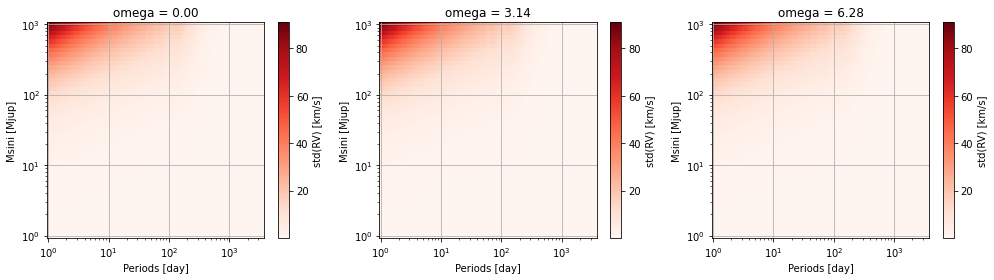

In [190]:
# Inputs
e            = 0.0                        # eccentricity
# M2sini       = 15.0 * M_jup             # companion mass (M*sin i)
M1           = 1.03 * M_sun               # mass of the star
phi0         = 0.0                        # time of periastron
v0_kms       = -117. #km/s
v0           = v0_kms*1000
                
# Time array
t = np.linspace(0, max(time)-min(time), 500) * 86400. # in seconds

# Kepler's equation solver
def kepler_eq(E, M, e):
    return E - e * np.sin(E) - M

def sample_omega(K, omega, P):
    # omega: argument of periastron (rad)
    
    # Compute RV curve
    vr = []
    for ti in t:
        M = 2 * np.pi * (ti - phi0) / P
        E = newton(kepler_eq, M, args=(M, e))
        nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
                            np.sqrt(1 - e) * np.cos(E / 2))
        v = K * (np.cos(nu + omega) + e * np.cos(omega))
        vr.append(v)

    vr     = np.array(vr) #+ v0
    vr_kms = np.array(vr)/1000. 
    
    return vr_kms

# Calculate semi-amplitude K
def get_K_amp(P, M2sini):
    K = ((2 * np.pi * G / P)**(1./3)) * (M2sini) / ((M1 + M2sini)**(2./3)) / np.sqrt(1. - e**2)  # in m/s
    return K

P_day  = np.logspace(0, np.log10(365*10), 100)
P      = P_day * day                          # orbital period in seconds
M2sini = np.logspace(0, 3, 50)*M_jup         # companion mass (M*sin i)
Ps,Ms  = np.meshgrid(P, M2sini)

omegas = np.linspace(0, 2*np.pi, 3)
plt.figure(figsize=(14,4))
scatter_per_omega = []
for i,omega_i in enumerate(omegas):
    
    Ks       = get_K_amp(Ps, Ms)
    vr_kms   = sample_omega(Ks, omega_i, Ps)
    scatter  = np.nanstd(vr_kms, axis=0)

    ax       = plt.subplot(1,3,i+1)
    print(np.shape(Ps),np.shape(Ms),np.shape(scatter))
    mesh     = ax.pcolormesh(Ps/day, Ms/M_jup, scatter, cmap='Reds')

#     print(np.min())
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Periods [day]')
    plt.ylabel('Msini [Mjup]')
    plt.title('omega = %.2f'%omega_i)
    plt.colorbar(mesh,label='std(RV) [km/s]')
    plt.grid()
    
    scatter_per_omega.append(scatter)

    
plt.tight_layout()
plt.savefig('../plots/plote_per_omega.png',bbox_inches='tight',dpi=200)
plt.show()


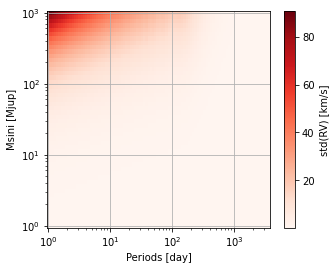

In [191]:

# Initialize a sum array with the first array's values
summed_over_omega = np.copy(scatter_per_omega[0])

# Loop through the remaining arrays and add them element-wise
for i in range(1, len(scatter_per_omega)):
    summed_over_omega += scatter_per_omega[i]
    
averaged_over_omega = summed_over_omega/len(scatter_per_omega)

plt.figure(figsize=(5,4))
ax       = plt.subplot(1,1,1)

mesh     = ax.pcolormesh(Ps/day, Ms/M_jup, averaged_over_omega, cmap='Reds')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Periods [day]')
plt.ylabel('Msini [Mjup]')
plt.colorbar(mesh,label='std(RV) [km/s]')
plt.grid()
# plt.savefig('../plots/plotf_all_omega.png',bbox_inches='tight',dpi=200)


In [197]:
np.min(averaged_over_omega),np.max(averaged_over_omega)

(3.731052612805727e-05, 90.9891309719347)

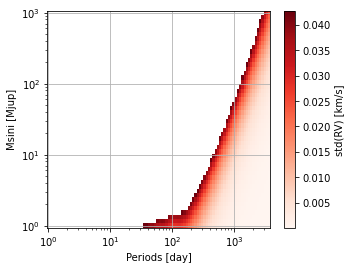

In [203]:

# # Initialize a sum array with the first array's values
# summed_over_omega = np.copy(scatter_per_omega[0])

# # Loop through the remaining arrays and add them element-wise
# for i in range(1, len(scatter_per_omega)):
#     summed_over_omega += scatter_per_omega[i]
    
mean_err = np.mean(rv_err) # km/s 
mask     = (averaged_over_omega >= mean_err)
rule_out = np.copy(averaged_over_omega)
rule_out[mask] = np.nan

plt.figure(figsize=(5,4))
ax       = plt.subplot(1,1,1)

mesh     = ax.pcolormesh(Ps/day, Ms/M_jup, rule_out, cmap='Reds')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Periods [day]')
plt.ylabel('Msini [Mjup]')
plt.colorbar(mesh,label='std(RV) [km/s]')
plt.grid()
# plt.savefig('../plots/plot_f.png',bbox_inches='tight',dpi=200)


In [135]:
import astropy.units as u


In [193]:
(np.min(scatter_d[0])*u.km/u.s).to(u.m/u.s), (np.mean(rv_err)*u.km/u.s).to(u.m/u.s)

(<Quantity 48.21055112 m / s>, <Quantity 42.893316 m / s>)

In [195]:
(np.min(averaged_over_omega)*u.km/u.s).to(u.m/u.s), (np.mean(rv_err)*u.km/u.s).to(u.m/u.s)

(<Quantity 0.03731053 m / s>, <Quantity 42.893316 m / s>)

(50, 30)


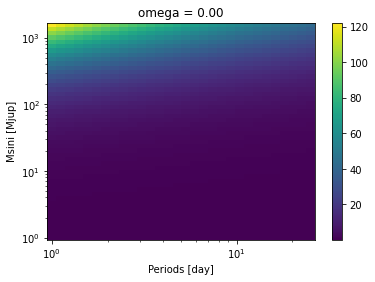

In [156]:

# Assuming `arr` is your original array with shape (500, 50, 30)
arr_mean = np.std(vr_kms, axis=0)

# Resulting shape will be (50, 30)
print(arr_mean.shape)


In [ ]:

# for j, omega_i in enumerate(omegas):
#     scatter_array  = np.zeros_like(Ps)
#     mean_array     = np.zeros_like(Ps)
#     median_array   = np.zeros_like(Ps)
#     for i, coord in enumerate(coordinates):
#         P_idx, M_idx              = indices[i]
#         P_i, M2sini_i             = coord
        
#         K                          = get_K_amp(P_i, M2sini_i)
#         vr_kms                     = sample_omega(K, omega_i, P_i)
#         scatter_array[M_idx,P_idx] = np.std(vr_kms)
#         mean_array[M_idx,P_idx]    = np.mean(vr_kms)
#         median_array[M_idx,P_idx]  = np.median(vr_kms)
        
#     scatter_d[j] = scatter_array
#     mean_d[j]    = mean_array
#     median_d[j]  = median_array
    